# procesamiento de microsatelites despues del msatcommander

In [1]:
from pandas import Series, DataFrame
import pandas as pd



In [2]:
f_micros = pd.read_csv("/Users/migueldelrio/Documents/SecuenciacionMasiva/Irene/Idt014/idt014_msat/msatcommander.microsatellites.csv", engine="python")
f_micros.head(2)

,name,records_id,id,motif,start,end,preceding,following,count
0,idt014_contig_1,0,0,AT,114,130,114,222,8
1,idt014_contig_13,12,1,AC,20,48,20,473,14


In [3]:
import pylab
import matplotlib.pyplot as plt


In [5]:
micros = []
micro = 0
n = 0
for rows in f_micros.index:
    row = f_micros.loc[rows]
    micro = row["name"], row["id"], len(row["motif"])
    #print (micro)
    n+=1
    micros.append(micro)
    #if n==10:
    #    break


In [6]:
micros = DataFrame(micros, columns=["name", "msats_id" ,"tipo"])
micros.head()

,name,msats_id,tipo
0,idt014_contig_1,0,2
1,idt014_contig_13,1,2
2,idt014_contig_23,2,2
3,idt014_contig_24,3,2
4,idt014_contig_26,4,2


In [7]:
f_micros["tipo"]=micros["tipo"]
f_micros.head()

,name,records_id,id,motif,start,end,preceding,following,count,tipo
0,idt014_contig_1,0,0,AT,114,130,114,222,8,2
1,idt014_contig_13,12,1,AC,20,48,20,473,14,2
2,idt014_contig_23,22,2,AT,297,327,297,3,15,2
3,idt014_contig_24,23,3,AC,258,276,258,66,9,2
4,idt014_contig_26,25,4,AG,254,270,254,98,8,2


In [10]:
df1 = f_micros.groupby("tipo")["name"].count()
df1

tipo
2    2614
3     634
4     597
5       1
6      22
Name: name, dtype: int64

save figure


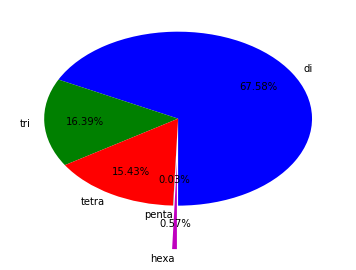

In [11]:
plt.pie(df1,              # data
        explode=(0, 0, 0, 0, 0.5),    # offset parameters 
        labels= ("di", "tri", "tetra","penta", "hexa"), #df1.index,      # slice labels
        labeldistance=1.1,
        pctdistance = 0.7, #(0., 0., 0., 0., 0., 0.5),
        colors=('b', 'g', 'r', 'c', 'm'),      # array of colours: colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w')
        autopct='%1.2f%%',  # print the values inside the wedges
        #shadow=True,        # enable shadow
        startangle=270       # starting angle
        )
yes = input("save figure")
if yes.lower()=="y":
    plt.savefig('/Users/migueldelrio/Documents/SecuenciacionMasiva/Irene/Idt014/idt014_msat/idt014_msat_pie.png', 
                dpi=400, bbox_inches='tight')
plt.show()


# para leer solo los micros que tiene un iniciador

In [12]:
# correr esta linea, si da error, ejecutar la siguiente cambiando "480" por el numero que de en el error,
# si se repite, restar uno a dicho valor (si es 481, poner 480)
f_micros_primer = pd.read_csv("/Users/migueldelrio/Documents/SecuenciacionMasiva/Irene/Idt014/idt014_msat/msatcommander.primers.csv", 
                               engine="python")
f_micros_primer.head(2)

ParserError: Expected 27 fields in line 482, saw 28

In [13]:
f_micros_primer = pd.read_csv("/Users/migueldelrio/Documents/SecuenciacionMasiva/Irene/Idt014/idt014_msat/msatcommander.primers.csv", 
                               nrows = 480, engine="python")
f_micros_primer.head(2)

,name,records_id,msats_id,primer,left,left_sequence,left_tm,left_gc,left_self_end,left_self_any,...,right_self_end,right_self_any,right_hairpin,right_end_stability,right_penalty,pair_product_size,pair_compl_end,pair_compl_any,pair_penalty,duplicate
0,idt014_contig_26,25,4,0,"218,20",CGCACGTACACAGACTCATG,59.741,55.0,0.0,0.0,...,0.0,2.52,0.0,4.00,2.076805,124.0,0.0,0.0,2.335521,0
1,idt014_contig_54,53,9,0,"55,20",CTCCCAGCTCACCACCTTAG,60.224,60.0,0.0,0.0,...,0.0,0.00,0.0,4.79,0.081915,273.0,0.0,0.0,0.305431,0


In [14]:
#para verificar que leyo hasta el ultimo valor
f_micros_primer.tail(2)

,name,records_id,msats_id,primer,left,left_sequence,left_tm,left_gc,left_self_end,left_self_any,...,right_self_end,right_self_any,right_hairpin,right_end_stability,right_penalty,pair_product_size,pair_compl_end,pair_compl_any,pair_penalty,duplicate
478,idt014_contig_37135,37134,3853,0,"42,20",GTCACTGATCTCATGCTCGC,59.527,55.0,0.0,0.0,...,0.0,0.0,0.0,4.30,0.151654,164.0,0.0,0.0,0.624343,0
479,idt014_contig_37810,37809,3867,0,"8,22",GGAGCCTTTGAATACTGGTACG,59.560,50.0,0.0,0.0,...,0.0,0.0,0.0,3.46,0.127550,108.0,0.0,0.0,2.567418,0


In [15]:
del micros["name"]
fmp = DataFrame.merge(f_micros_primer, micros, on = "msats_id")
fmp.head()

,name,records_id,msats_id,primer,left,left_sequence,left_tm,left_gc,left_self_end,left_self_any,...,right_self_any,right_hairpin,right_end_stability,right_penalty,pair_product_size,pair_compl_end,pair_compl_any,pair_penalty,duplicate,tipo
0,idt014_contig_26,25,4,0,"218,20",CGCACGTACACAGACTCATG,59.741,55.000,0.0,0.0,...,2.52,0.0,4.00,2.076805,124.0,0.0,0.0,2.335521,0,2
1,idt014_contig_54,53,9,0,"55,20",CTCCCAGCTCACCACCTTAG,60.224,60.000,0.0,0.0,...,0.00,0.0,4.79,0.081915,273.0,0.0,0.0,0.305431,0,2
2,idt014_contig_56,55,10,0,"50,20",GTGCTCTTTGAGGGTAAGGG,58.642,55.000,0.0,0.0,...,0.00,0.0,4.26,2.293729,188.0,0.0,0.0,3.651264,0,2
3,idt014_contig_69,68,11,0,"90,20",AAGAACTCGGAAGGTTGGGC,61.014,55.000,0.0,0.0,...,10.86,0.0,4.70,0.434550,143.0,0.0,0.0,1.449038,0,4
4,idt014_contig_70,69,12,0,"66,21",GAAATAGGCTCCGTTGTCCAC,59.743,52.381,0.0,0.0,...,0.00,0.0,5.34,1.668204,216.0,0.0,0.0,2.925453,0,2


In [16]:
df1 = fmp.groupby("tipo")["name"].count()
df1

tipo
2    330
3     89
4     54
6      7
Name: name, dtype: int64

save figure


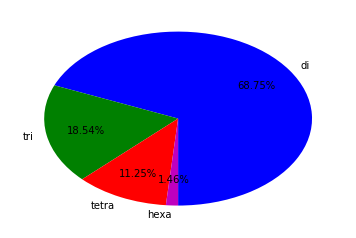

In [17]:
# verificar que esten todas las etiquetas
plt.pie(df1,              # data
        #explode=(0, 0, 0, 0, 0.5),    # offset parameters 
        labels= ("di", "tri", "tetra", "hexa"), #df1.index,      # slice labels
        labeldistance=1.1,
        pctdistance = 0.7, #(0., 0., 0., 0., 0., 0.5),
        colors=('b', 'g', 'r', 'm'),      # array of colours: colors=('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w')
        autopct='%1.2f%%',  # print the values inside the wedges
        #shadow=True,        # enable shadow
        startangle=270       # starting angle
        )
yes = input("save figure")
if yes.lower()=="y":
    plt.savefig('/Users/migueldelrio/Documents/SecuenciacionMasiva/Irene/Idt014/idt014_msat/idt014_msat_pie.png', 
                dpi=400, bbox_inches='tight')
plt.show()